In [5]:
# import sys 
# sys.path.append("/Users/my-air/Desktop/DSA/Github/Data Engineering/DE-Notes/Projects/Scripts")
# print(sys.path)

In [6]:
from CreateDataframe import find_and_make_dataset 

In [7]:
dataset = find_and_make_dataset("data", "aerofit")

Dataset folder found at: /Users/my-air/Desktop/DSA/Github/Data Engineering/DE-Notes/Projects/data 

Dataset file found: aerofit.zip

Processing file: /Users/my-air/Desktop/DSA/Github/Data Engineering/DE-Notes/Projects/data/aerofit.zip 

['datasets/', 'datasets/aerofit_treadmill_data.csv']
Extracting datasets/aerofit_treadmill_data.csv and converting it to a dataframe 

Sucessfully processed the data file: datasets/aerofit_treadmill_data.csv 

datasets/aerofit_treadmill_data.csv removed 

Directory removed
New dataset added to dataframes dict: dict_keys(['aerofit'])


# Assignment
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500;

The KP481 is for mid-level runners and sells for $1,750;

The KP781 treadmill is having advanced features and it sells for $2,500.

In [8]:
dataset.keys()

dict_keys(['aerofit'])

In [45]:
!conda install seaborn --yes

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.0
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base/envs/prj_aerofit

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.15  |       hca03da5_0         127 KB
    certifi-2025.8.3           |  py312hca03da5_0         161 KB
    seaborn-0.13.2             |  py312hca03da5_3         717 KB
    ------------------------------------------------------------
                                           Total:        1004 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-arm64::seaborn-0.13.2-py312hca03da5_3 

The followi

In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [10]:
df = dataset['aerofit']["aerofit_treadmill_data.csv"] ## getting the dataframe stored in the dict key for aerofit dataset

In [11]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [12]:
df.shape

(180, 9)

In [13]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [14]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

#### Converting the object dtype t categeory dtype 

In [15]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


#### Understanding the skewness of the data 

In [17]:
df.skew(numeric_only = True) ## numeric_only = True will not take the category dtype attributes 

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

##### Here, Income and Miles is highly skewed indicating that there are some outliers or customers who have income and acquired miles way moret than the mean or average of the data. 
##### Even for Age we see it as moderately skewed which indicates that there are some data points on age of the customers which are greater than the mean age or avg age in the data

Age count distribution: Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
Name: count, dtype: int64

 Mean Age in data: 28.79

 Axes(0.125,0.11;0.775x0.77)


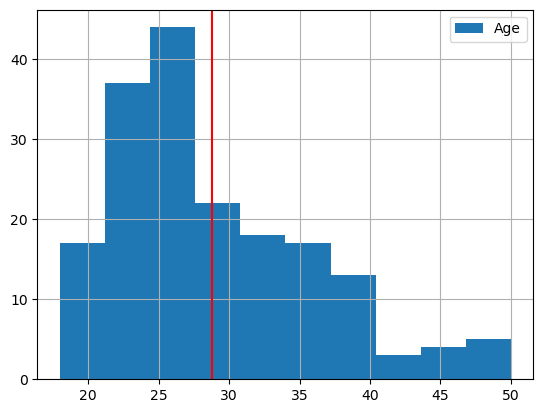


 As per histogram we see that we have age distribution 28-40 similar to 25-26 age groups 



In [18]:
print("Age count distribution:",df.Age.value_counts().head(8))
print("\n Mean Age in data:", round(df.Age.mean(),2))
print("\n",df.Age.hist(legend = True))
plt.axvline(df.Age.mean(), color = "red")
plt.show()
print("\n As per histogram we see that we have age distribution 28-40 similar to 25-26 age groups \n")

Top income distribution: Income
45480    14
52302     9
46617     8
54576     8
53439     8
50028     7
51165     7
40932     6
48891     5
32973     5
Name: count, dtype: int64

 Mean Income: 53719.58

 Axes(0.125,0.11;0.775x0.77)


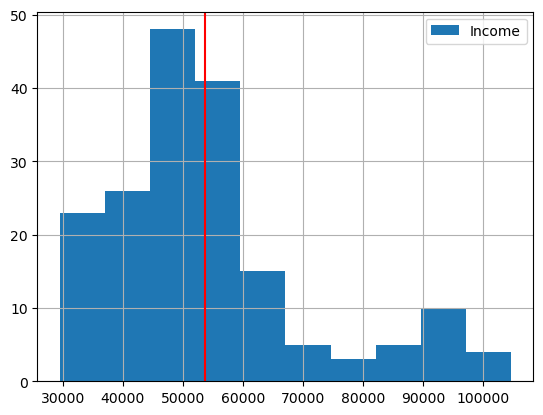

 
 As we see in the histogram, we have some customers - less no than most but a few customers are having Income a lot more than the mean Income 



In [19]:
print("Top income distribution:", df.Income.value_counts().nlargest(10))
print("\n Mean Income:", round(df.Income.mean(),2))
print("\n",df.Income.hist(legend = True))
plt.axvline(df.Income.mean(), color= "red")
plt.show()
print(" \n As we see in the histogram, we have some customers - less no than most but a few customers are having Income a lot more than the mean Income \n")

Miles count distribution:  Miles
85    27
95    12
66    10
75    10
47     9
Name: count, dtype: int64

 Miles mean: 103.19
Axes(0.125,0.11;0.775x0.77)


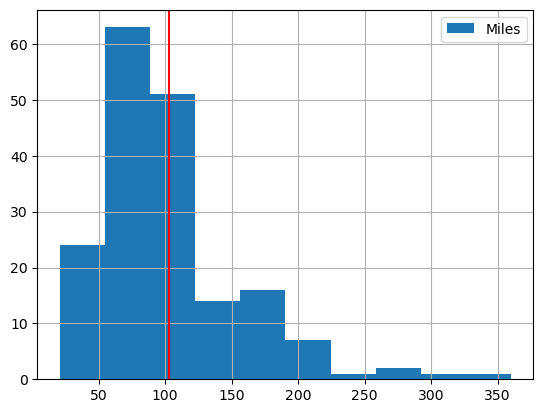

There is some skewness in Miles as seen in the histogram, with average miles around 85-100


In [20]:
print("Miles count distribution: ", df.Miles.value_counts().nlargest(5))
print("\n Miles mean:", round(df.Miles.mean(),2))
print(df.Miles.hist(legend = True))
plt.axvline(df.Miles.mean(), color = "red")
plt.show()
print("There is some skewness in Miles as seen in the histogram, with average miles around 85-100")

Axes(0.125,0.11;0.775x0.77)


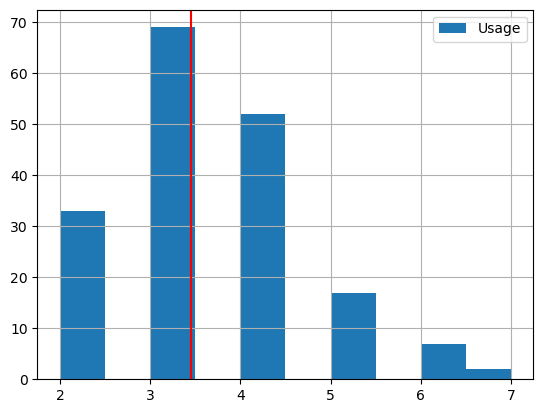

In [21]:
print(df.Usage.hist( legend=True))
plt.axvline(df.Usage.mean(), color="red")
plt.show()

#### Skewness is defined as the extend to which the data in a distribution is not symmetric around the mean 
#### -ve | (mean) +ve

In [22]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#### Observations:
<ol>
<li>There are no missing values in any columns as evident by the count on each column.</li>
<li> There are 3 unique products in the dataset with KP281 the most frequently bought product </li>
<li> The average age in the dataset is 28.8 years. </li>
<li> The min age of customers in the dataset is 18 yrs. And the max age of the customers in the dataset is 50 yrs.</li>
<li> Out of 180 people there are 104 male customers thus male is the majority customer profile gender.</li>
<li> Education profile of the customers in the dataset has an avg 16 yrs of education. </li>
<li> the Standard deviation is very high for Miles and Income. That means there is more spread or variation in the datapoints from the mean. More variations in the dataset means there will be some outliers.</li>
<ol>

In [23]:
#describe on a series: 
# df[df.columns[1]].describe()

In [24]:
df.isna().sum() ##no missing values in the dataset

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [25]:
df.duplicated(subset=None, keep='first').sum() ##no dups in the dataset

np.int64(0)

In [26]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [27]:
df[df.columns[0]].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [28]:
df[df.columns[2]].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [29]:
df[df.columns[4]].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [30]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [41]:
df.Age.value_counts()

Age
25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: count, dtype: int64

### Graphical Analysis:

### 1) Univariate Anlaysis -Numerical Values

##### Histogram

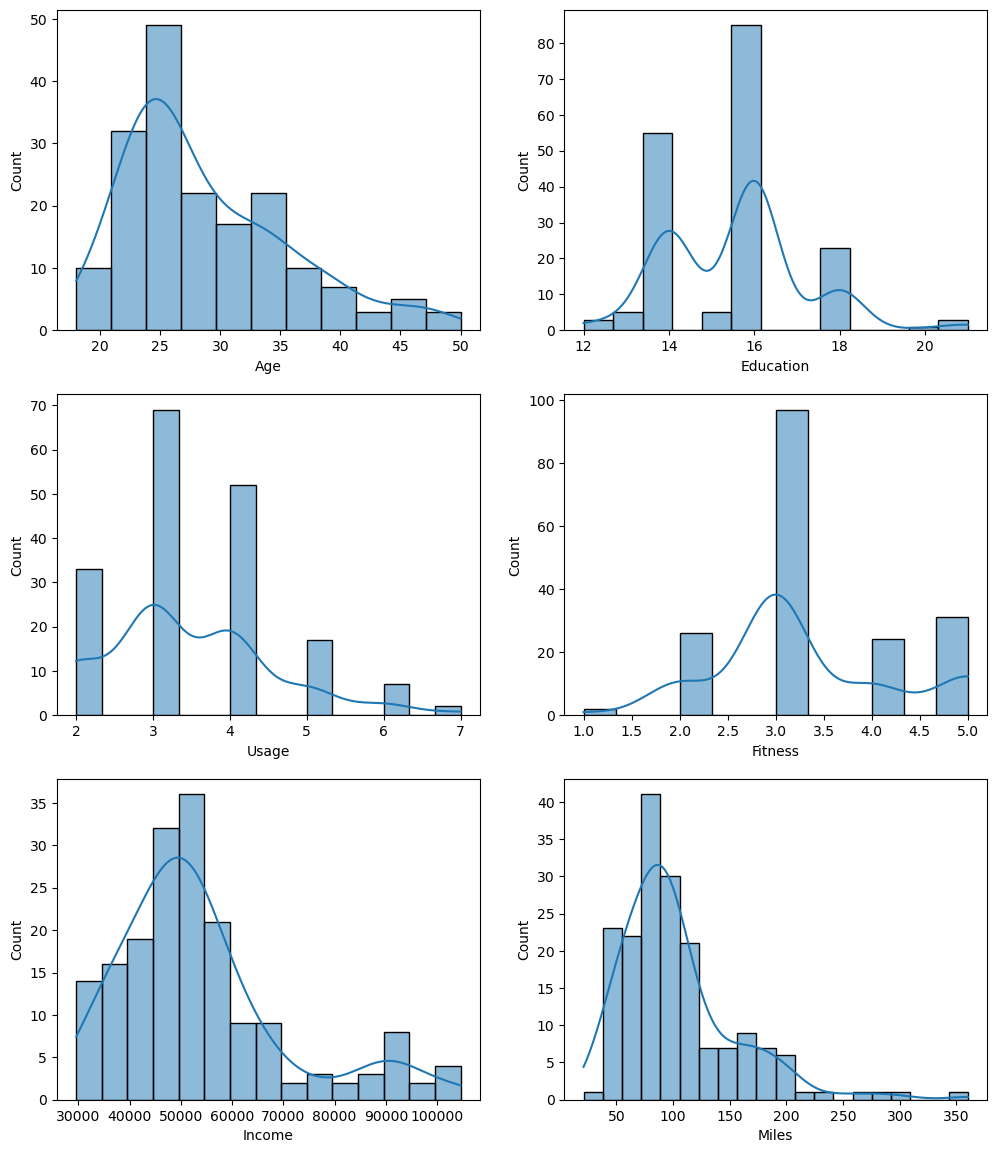

In [49]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12,10))
fig.subplots_adjust(top=1.2)

sns.histplot(df['Age'], kde=True, ax=axis[0,0])
sns.histplot(df['Education'], kde=True, ax=axis[0,1])
sns.histplot(df['Usage'], kde=True, ax=axis[1,0])
sns.histplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.histplot(df['Income'], kde=True, ax=axis[2,0])
sns.histplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()

##### Observations:
Based on this histogram, we see that:
<li> Customers with income profile from more than 45K to 60K is the income range of most of the customers for Aerofit. </li>
<li> In terms of the miles achieved, Aerofit customers have achvied mile distance from 55 miles to 105 miles. 
<li> Most aerofit customers have fitness of 3
<li> Most of the customers of Aerofit are in the age groups 22+ to 35 yrs. 



##### Count plot

ValueError: Could not interpret value `MartialStatus` for `x`. An entry with this name does not appear in `data`.

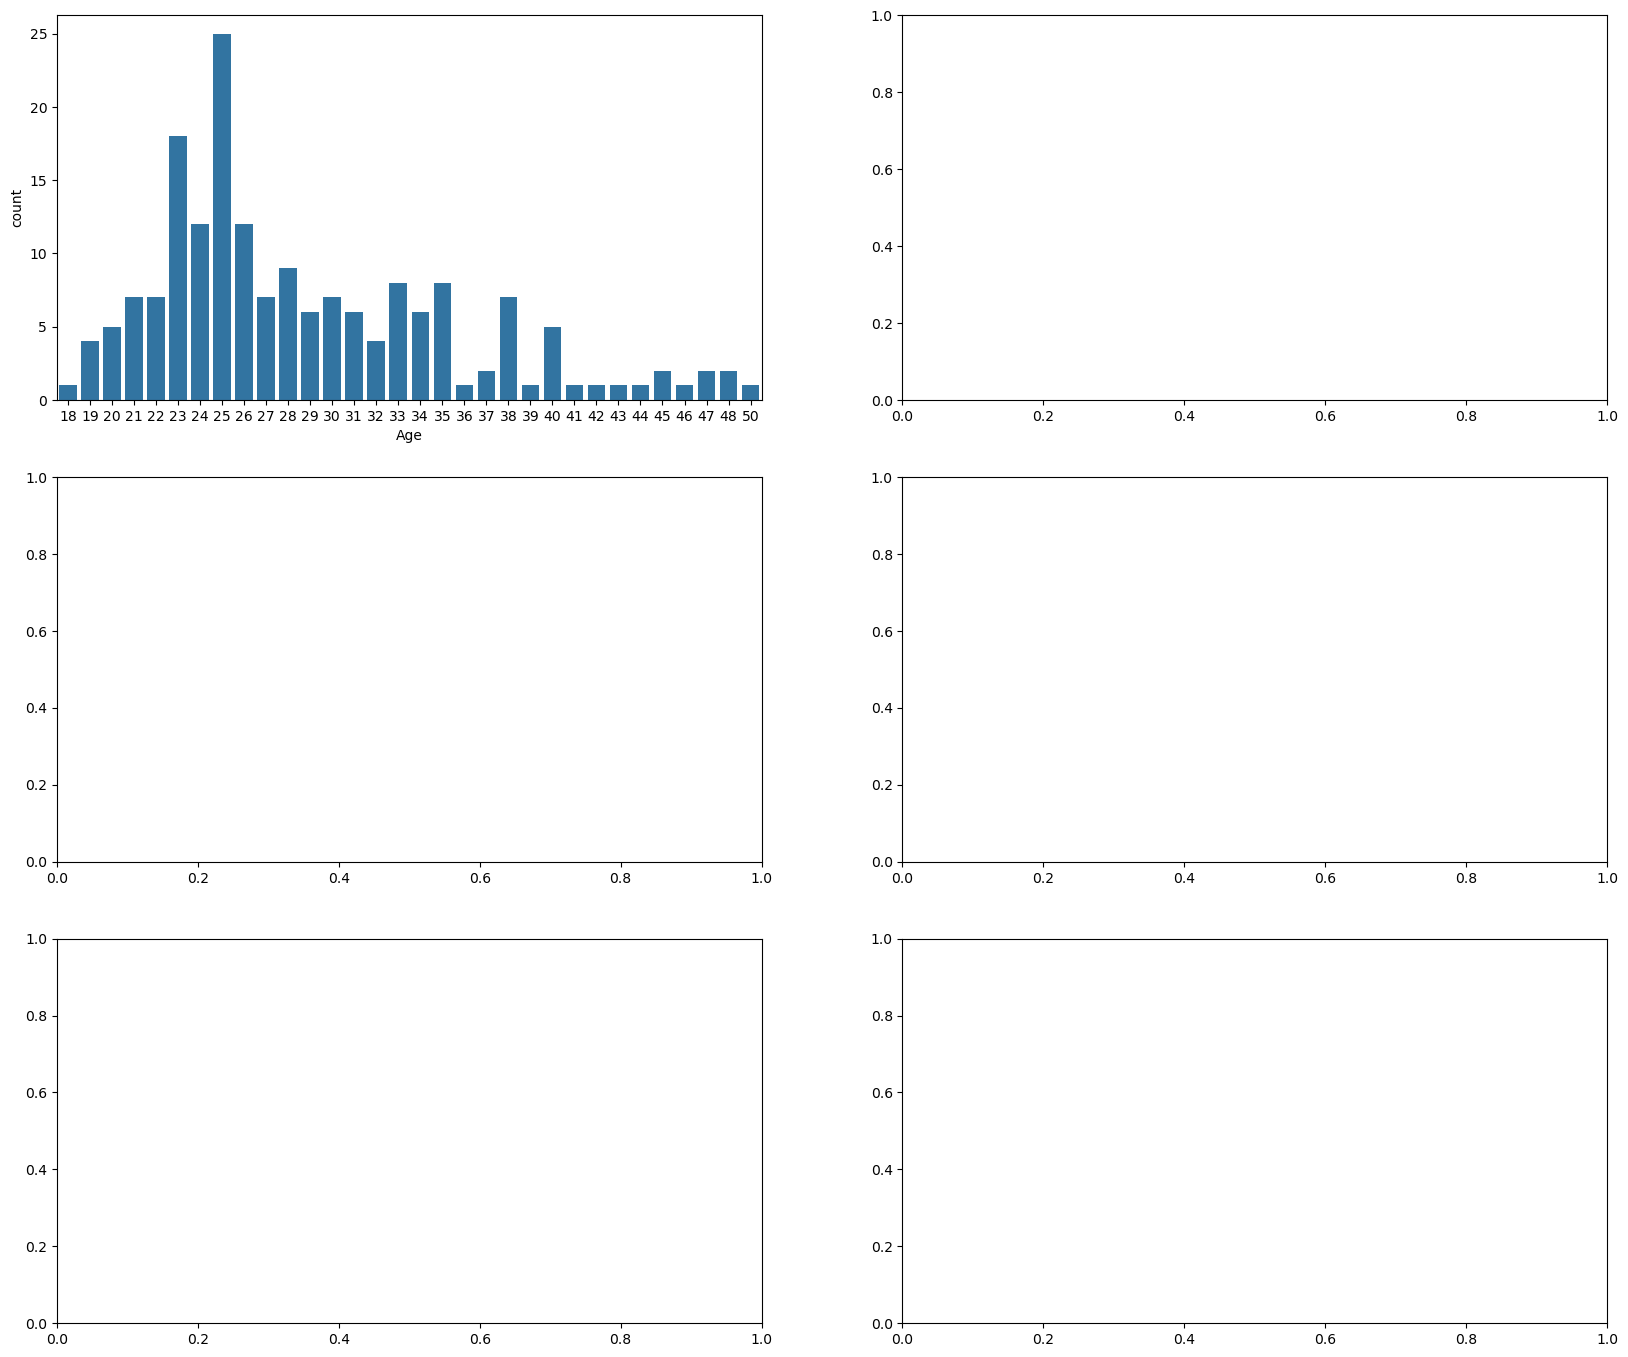

In [ ]:
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="MaritalStatus", ax=axis[0,1])
sns.countplot(data=df, x="Gender", ax=axis[1,0])
sns.countplot(data=df, x="Product", ax=axis[1,1])
sns.countplot(data=df, x="Fitness", ax=axis[2,0])
sns.countplot(data=df, x="Usage", ax=axis[2,1])

plt.show()

##### Observations:
<li> People of age group 25 are more health conscious about health and are using treadmile for 3 times or more than older people.  

##### Box plot

In [ ]:
fig, axis = plt.subplots()
